## Visualizations for the icestorm project

In [1]:
# import os
# from glob import glob

# from datetime import datetime, timedelta

# import numpy as np
# import pandas as pd
# import xarray as xr

# from statistics import median

# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# from matplotlib import cm

# import cartopy
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# import metpy.calc as mpcalc
# from metpy.units import units
# import scipy.ndimage as ndimage

from palettable.scientific.sequential import LaJolla_20, Oleron_9
from palettable.cmocean.diverging import Curl_6
from palettable.cmocean.sequential import Deep_20

from plot import *

### Utility Functions

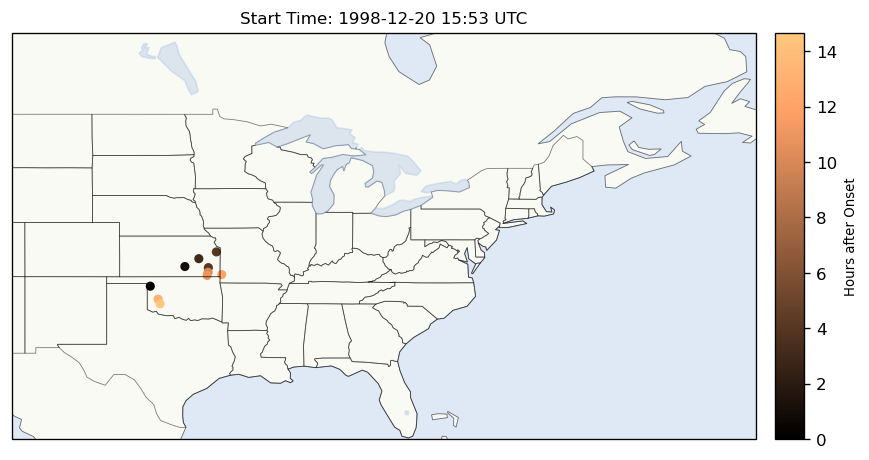

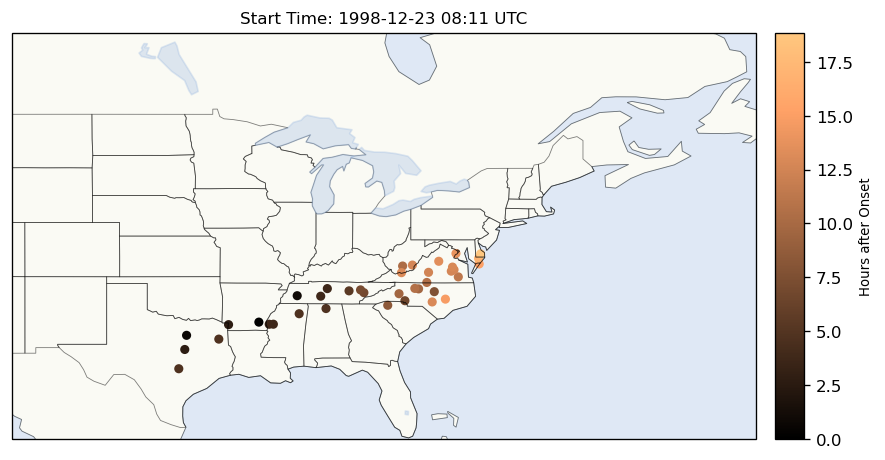

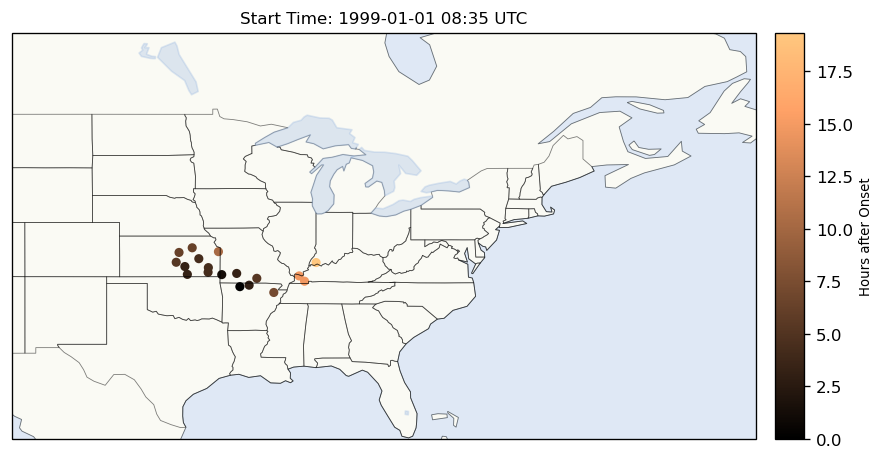

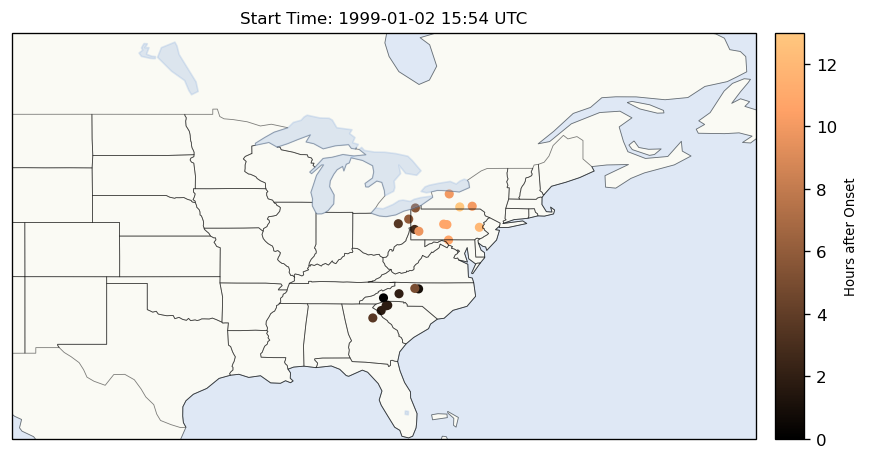

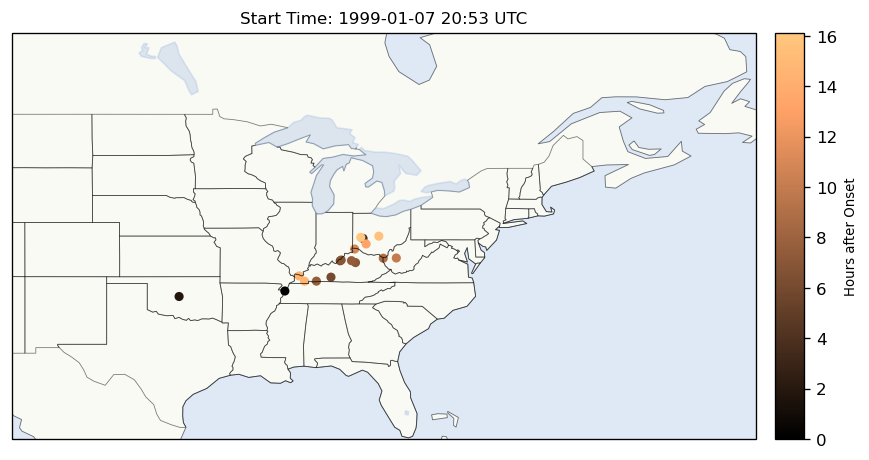

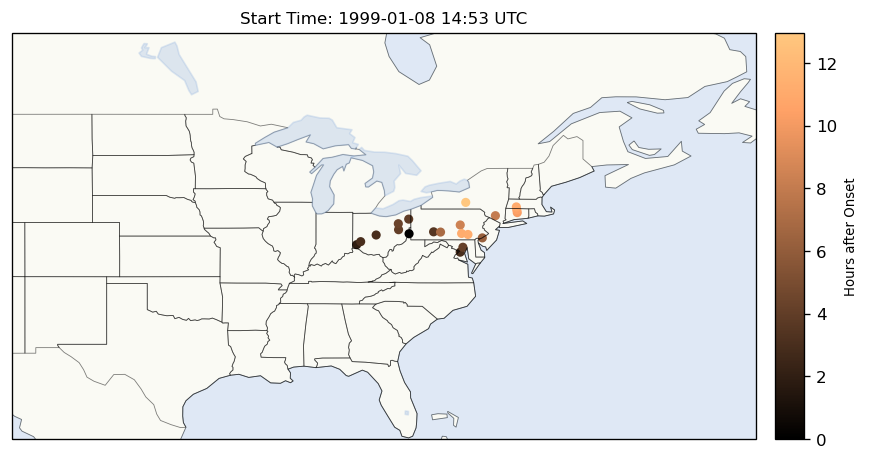

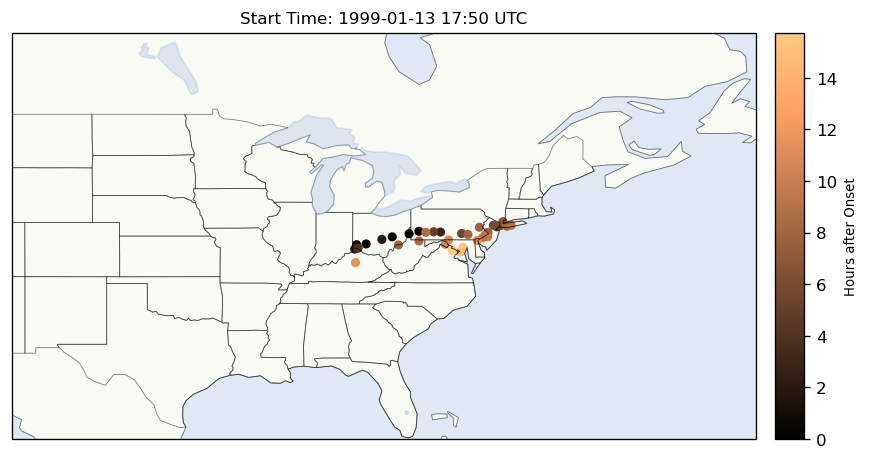

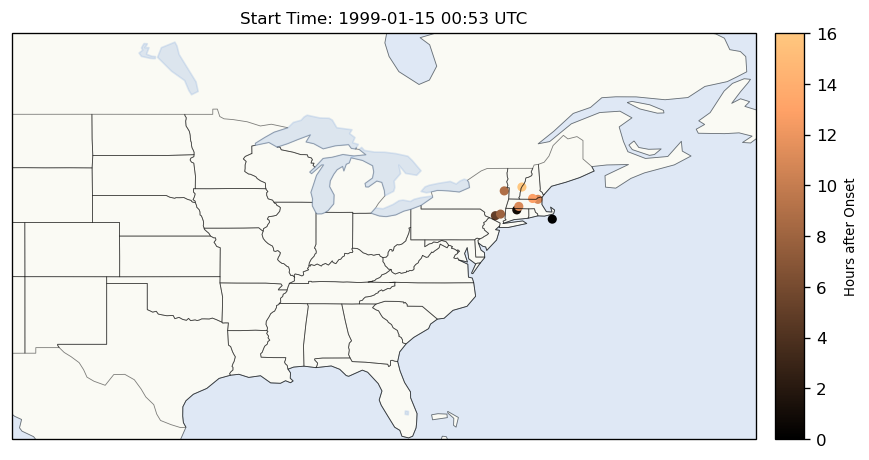

In [2]:
plot_events_by_year(1998)

/home/hz542/miniconda3/lib/python3.9/site-packages/metpy/xarray.py:1473: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  warnings.warn(


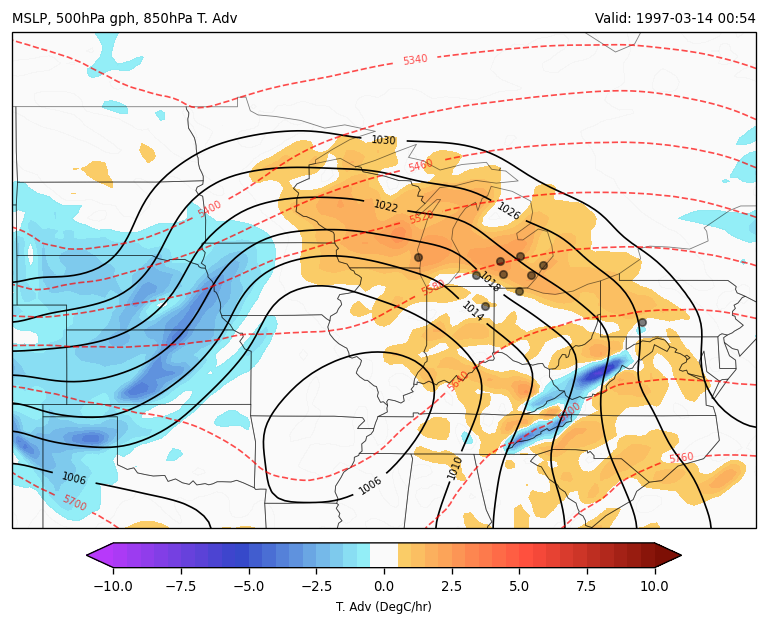

In [3]:
events = find_all_events_by_year(1996)
event = events[0]

tadvplot = Plot.from_csv(event)
tadvplot.add_basemap(land=False)

msl = tadvplot.get_sfc_data().msl / 100.
msl = ndimage.gaussian_filter(msl, sigma=3.0, order=0)

clabeldict = {
    'fontsize': 6, 
    'inline': 1,
    'inline_spacing': 10,
    'fmt': '%i',
    'rightside_up': True,
    'use_clabeltext': True
}

pres_clevs = np.arange(950, 1034, 4)
gph_clevs = np.arange(4200, 6000, 60)

tadvplot.contour(msl, clabeldict=clabeldict, levels=pres_clevs, colors='black', linewidths=1.,
                 linestyles='solid', transform=prj)

z = tadvplot.get_pres_data().sel(level=500).z / 9.81
tadvplot.contour(z, clabeldict=clabeldict, levels=gph_clevs, colors='red', linewidths=1.,
                 linestyles='dashed', transform=prj, alpha=0.7)

t_anom_cmap = mcolors.LinearSegmentedColormap.from_list('t. anomaly', 
                                 [(0, '#b739fa'),
                                  (0.25, '#3446c9'),
                                  (0.4999, '#98f8fa'),
                                  (0.5001, '#fad369'),
                                  (0.75, '#ff4d3d'),
                                  (1, '#7d0f05')])
interval, maximum = 0.5, 10
norm, cmap = tadvplot.contourf(tadvplot.t_advection(level=850), t_anom_cmap, interval=interval, 
                               maximum=maximum)
tadvplot.set_cbar(norm, cmap, orientation='horizontal', annotation='T. Adv (DegC/hr)', 
                  pad=0.02, shrink=0.8, aspect=24, extend='both', labelsize=8, fontsize=7)
tadvplot.set_title('MSLP, 500hPa gph, 850hPa T. Adv')

# tadvplot.barbs(level=850, lw=0.3, length=5, transform=prj, pivot='middle')

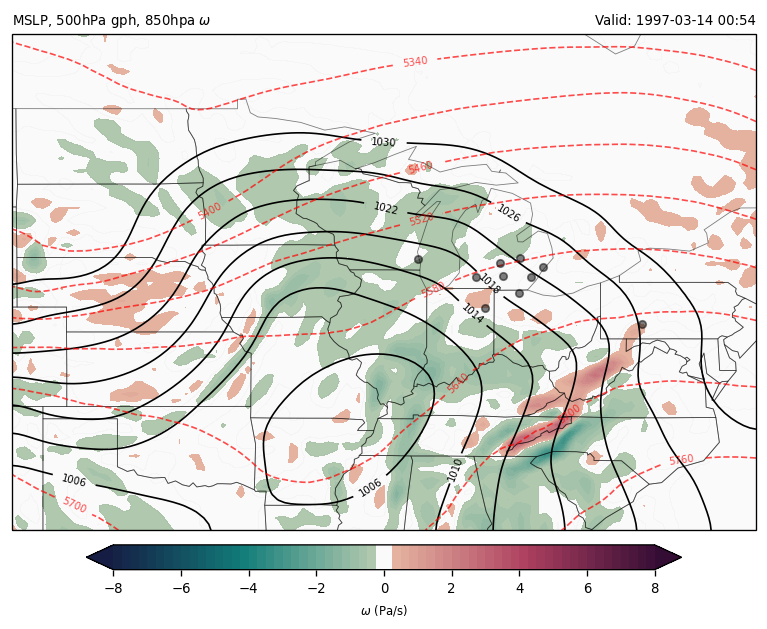

In [4]:
vvplot = Plot.from_csv(event)
vvplot.add_basemap(land=False)

vv = vvplot.get_pres_data().sel(level=850).w

msl = vvplot.get_sfc_data().msl / 100.
msl = ndimage.gaussian_filter(msl, sigma=3.0, order=0)

vvplot.contour(msl, clabeldict=clabeldict, levels=pres_clevs, colors='black', linewidths=1.,
                 linestyles='solid', transform=prj)

z = vvplot.get_pres_data().sel(level=500).z / 9.81
vvplot.contour(z, clabeldict=clabeldict, levels=gph_clevs, colors='red', linewidths=1.,
                 linestyles='dashed', transform=prj, alpha=0.7)

vv_cmap = mcolors.LinearSegmentedColormap.from_list('Omega', 
                                 list(zip([0, 0.25, 0.4999, 0.5001, 0.75, 1], Curl_6.mpl_colors)))

interval, maximum = 0.25, 8
norm, cmap = vvplot.contourf(vv, vv_cmap, interval=interval, maximum=maximum)

vvplot.set_cbar(norm, cmap, orientation='horizontal', annotation='$\omega$ (Pa/s)', 
                pad=0.02, shrink=0.8, aspect=24, extend='both', 
                ticks=np.arange(-8, 10, 2), labelsize=8, fontsize=7)
vvplot.set_title('MSLP, 500hPa gph, 850hpa $\omega$')

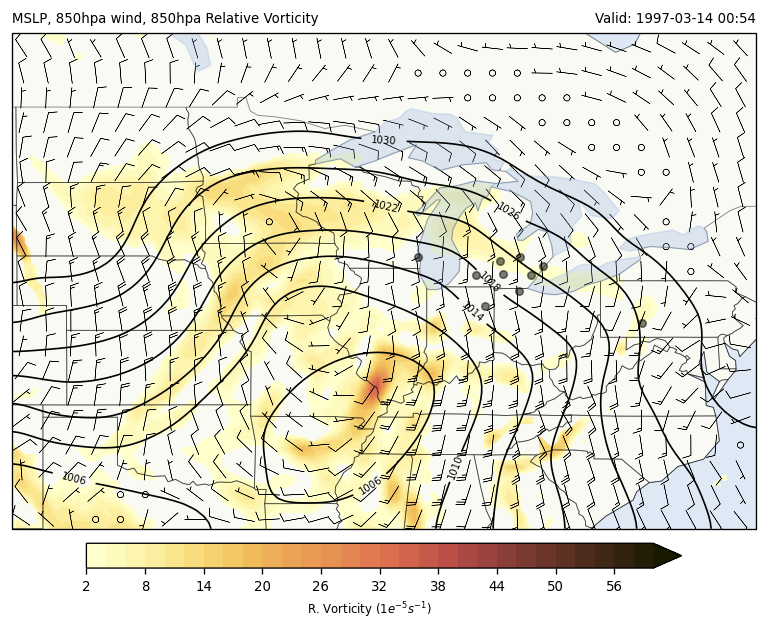

In [5]:
vort_plot = Plot.from_csv(event)
vort_plot.add_basemap()

msl = vort_plot.get_sfc_data().msl / 100.
msl = ndimage.gaussian_filter(msl, sigma=3.0, order=0)

vort_plot.contour(msl, clabeldict=clabeldict, levels=pres_clevs, colors='black', linewidths=1.,
                 linestyles='solid', transform=prj)

vorticity = vort_plot.get_pres_data().sel(level=850).vo * 1e5
vorticity = vorticity.where(vorticity > 0)

interval, minimum, maximum = 2, 2, 60

norm, cmap = vort_plot.contourf(vorticity, LaJolla_20.mpl_colormap, category='sequential',
                                interval=interval, minimum=minimum, maximum=maximum, set_under=False)
vort_plot.set_cbar(norm, cmap, orientation='horizontal', annotation='R. Vorticity ($1e^{-5} s^{-1}$)', 
                pad=0.02, shrink=0.8, aspect=24, extend='max', labelsize=8, fontsize=7)

vort_plot.barbs(level=850, lw=0.3, length=5, transform=prj, pivot='middle')

vort_plot.set_title('MSLP, 850hpa wind, 850hpa Relative Vorticity')

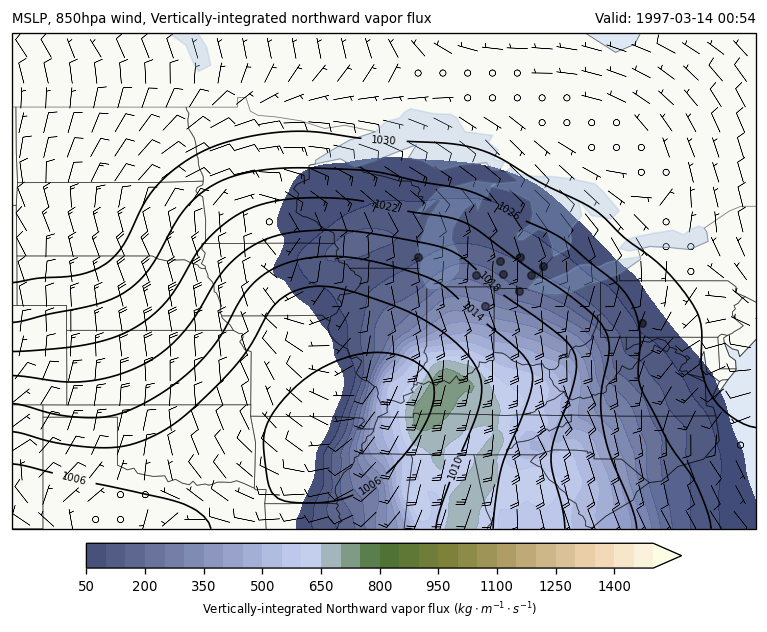

In [6]:
northvf_plot = Plot.from_csv(event)
northvf_plot.add_basemap()

msl = northvf_plot.get_sfc_data().msl / 100.
north_vf = northvf_plot.get_sfc_data().variables['p72.162']
north_vf = north_vf.where(north_vf > 0)

msl = ndimage.gaussian_filter(msl, sigma=3.0, order=0)

northvf_plot.contour(msl, clabeldict=clabeldict, levels=pres_clevs, colors='black', linewidths=1.,
                     linestyles='solid', transform=prj)

interval, minimum, maximum = 50, 50, 1500
norm, cmap = northvf_plot.contourf(north_vf, Oleron_9.mpl_colormap, category='sequential', interval=interval, 
                      minimum=minimum, maximum=maximum, set_under=False, alpha=0.8)

northvf_plot.barbs(level=850, lw=0.3, length=5, transform=prj, pivot='middle')
northvf_plot.set_cbar(norm, cmap, orientation='horizontal', 
                      annotation='Vertically-integrated Northward vapor flux ($kg \cdot m^{-1} \cdot s^{-1}$)', 
                      pad=0.02, shrink=0.8, aspect=24, extend='max', labelsize=8, fontsize=7, alpha=0.8)

northvf_plot.set_title('MSLP, 850hpa wind, Vertically-integrated northward vapor flux')

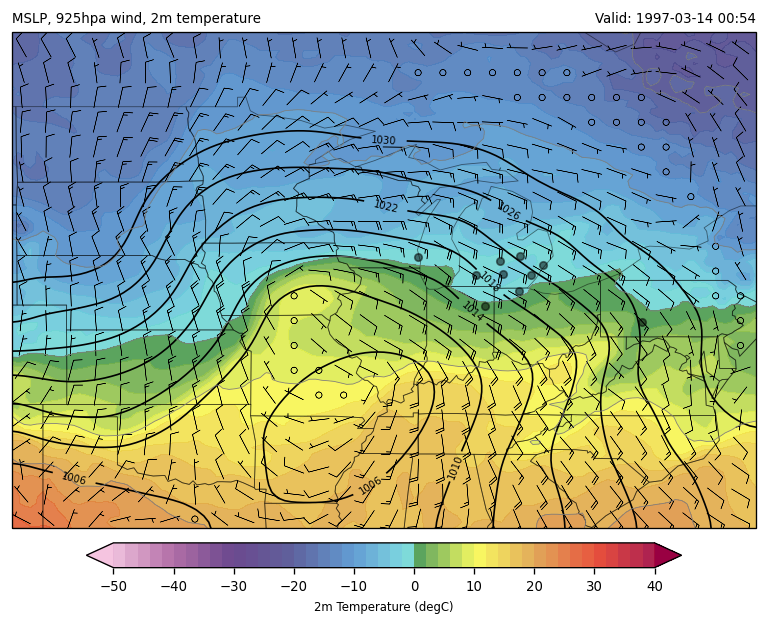

In [7]:
sfct_plot = Plot.from_csv(event)
sfct_plot.add_basemap(land=False)

sfct = sfct_plot.get_sfc_data().t2m - 273.15
msl = sfct_plot.get_sfc_data().msl / 100.
msl = ndimage.gaussian_filter(msl, sigma=3.0, order=0)

sfct_plot.contour(msl, clabeldict=clabeldict, levels=pres_clevs, colors='black', linewidths=1.,
                  linestyles='solid', transform=prj)

interval, minimum, maximum = 2, -50, 40

norm, cmap = sfct_plot.contourf(sfct, temp_cmap, category='sequential', interval=interval,
                                minimum=minimum, maximum=maximum, alpha=0.9)

sfct_plot.contour(sfct, clabel=False, levels=np.arange(-50, 40, 10), colors='grey', linewidths=0.5, 
                  linestyles='solid', transform=prj)

sfct_plot.set_cbar(norm, cmap, orientation='horizontal', 
                   annotation='2m Temperature (degC)', 
                   pad=0.02, shrink=0.8, aspect=24, extend='both', labelsize=8, fontsize=7, alpha=0.9)

sfct_plot.barbs(level=925, lw=0.3, length=5, transform=prj, pivot='middle')

sfct_plot.set_title('MSLP, 925hpa wind, 2m temperature')

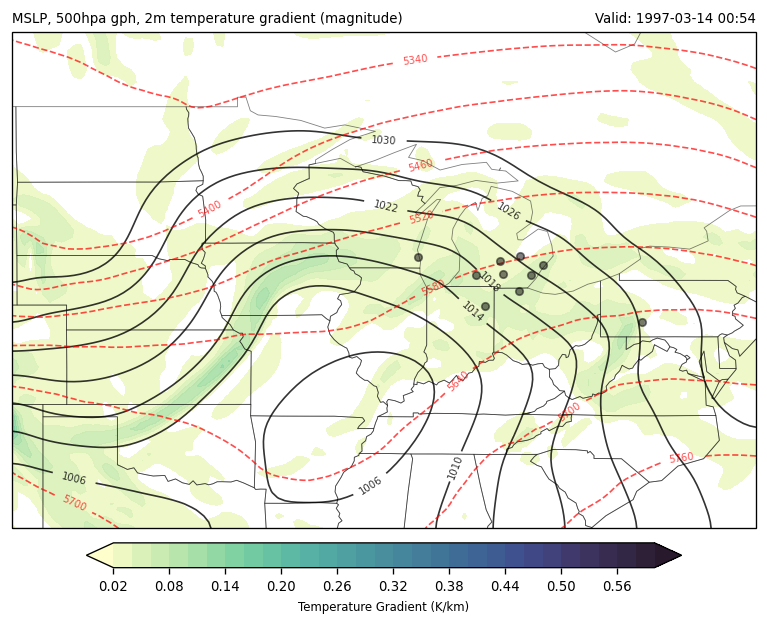

In [8]:
tgrad_plot = Plot.from_csv(event)
tgrad_plot.add_basemap(land=False)

tgrad_x, tgrad_y = tgrad_plot.t_gradient(level=925)
tgrad_x = tgrad_x.metpy.convert_units('kelvin/kilometer').values
tgrad_y = tgrad_y.metpy.convert_units('kelvin/kilometer').values

msl = tgrad_plot.get_sfc_data().msl / 100.
msl = ndimage.gaussian_filter(msl, sigma=3.0, order=0)

tgrad_plot.contour(msl, clabeldict=clabeldict, levels=pres_clevs, colors='black', linewidths=1.,
                   linestyles='solid', transform=prj, alpha=0.8)

z = tgrad_plot.get_pres_data().sel(level=500).z / 9.81
tgrad_plot.contour(z, clabeldict=clabeldict, levels=gph_clevs, colors='red', linewidths=1.,
                   linestyles='dashed', transform=prj, alpha=0.7)

# This should be in kelvin/kilometer
tgrad_magnitude = np.linalg.norm(np.stack([tgrad_x, tgrad_y]), axis=0)

interval, minimum, maximum = 0.02, 0.02, 0.6
norm, cmap = tgrad_plot.contourf(tgrad_magnitude, Deep_20.mpl_colormap, category='sequential', 
                                 interval=interval, minimum=minimum, maximum=maximum, alpha=0.9)

tgrad_plot.set_cbar(norm, cmap, orientation='horizontal', 
                   annotation='Temperature Gradient (K/km)', 
                   pad=0.02, shrink=0.8, aspect=24, extend='both', labelsize=8, fontsize=7)

tgrad_plot.set_title('MSLP, 500hpa gph, 2m temperature gradient (magnitude)')

### Type of events

- Mid-latitude cyclones, e.g. Jan 22, 2016 
- Weak stationary/cold fronts with warmer air aloft, e.g. Dec 10, 2020. 
- Cutoff low upstream, largely zonal flow with weak upper-air forcing. Usually preceded by a powerful mid-latitude cyclone and moderate WAA at 850 hPa. 

### Relative location between trough/surface low/event

- Split flow pattern is common.

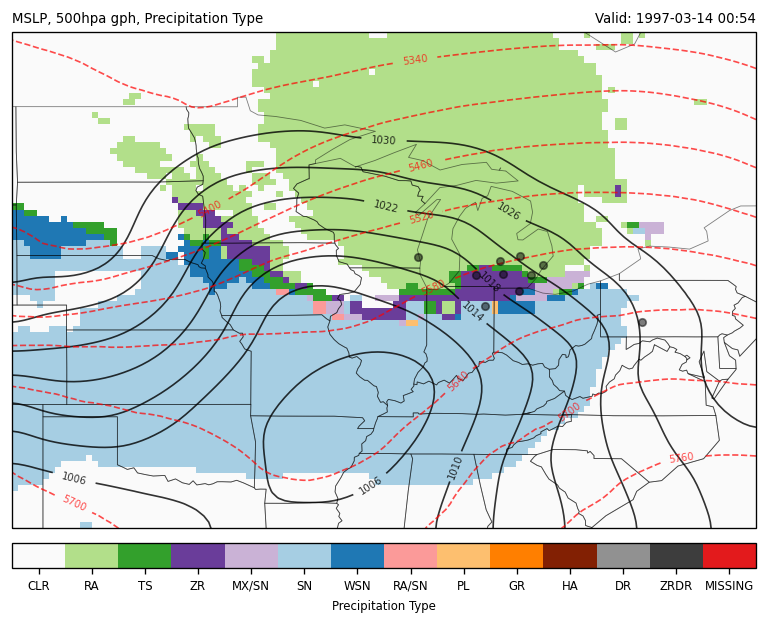

In [9]:
# t = datetime(1996, 2, 1, hour=21)
ptype_plot = Plot.from_csv(event)
ptype_plot.add_basemap(land=False)

ptype = ptype_plot.get_sfc_data().ptype.round()
tp = ptype_plot.get_sfc_data().tp

cond_rain = (tp > 2.5e-5) & ptype.isin([1, 2, 3, 4, 7, 8, 9, 10])
cond_snow = (tp > 2.5e-6) & ptype.isin([5, 6])

ptype = xr.where(cond_rain | cond_snow, ptype, 0)

msl = ptype_plot.get_sfc_data().msl / 100.
msl = ndimage.gaussian_filter(msl, sigma=3.0, order=0)

ptype_plot.contour(msl, clabeldict=clabeldict, levels=pres_clevs, colors='black', linewidths=1.,
                   linestyles='solid', transform=prj, alpha=0.8)

z = ptype_plot.get_pres_data().sel(level=500).z / 9.81
ptype_plot.contour(z, clabeldict=clabeldict, levels=gph_clevs, colors='red', linewidths=1.,
                   linestyles='dashed', transform=prj, alpha=0.7)

cmap = mcolors.ListedColormap(['#fafafa', '#b2df8a', '#33a02c', '#6a3d9a', '#cab2d6', '#a6cee3', 
                               '#1f78b4', '#fb9a99', '#fdbf6f', '#ff7f00', '#822003', '#919191', 
                               '#3d3d3d', '#e31a1c'])
norm = mcolors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 255.5], cmap.N)

ticks = list(range(0, 13)) + [134]
ticklabeldict = {0: 'CLR', 1: 'RA', 2: 'TS', 3: 'ZR', 4: 'MX/SN', 5: 'SN', 6: 'WSN', 
                 7: 'RA/SN', 8: 'PL', 9: 'GR', 10: 'HA', 11: 'DR', 12: 'ZRDR', 134: 'MISSING'}

ptype_plot.imshow(ptype, cmap=cmap, norm=norm, transform=prj)
ptype_plot.set_cbar(norm, cmap, orientation='horizontal', 
                    annotation='Precipitation Type', 
                    pad=0.02, aspect=30, labelsize=7, fontsize=7, 
                    ticks=ticks, ticklabels=[ticklabeldict[k] for k in ticks])

ptype_plot.set_title('MSLP, 500hpa gph, Precipitation Type')